# Group 12
### Members:
- DIZON, GAVIN RAINE R.
- PALMARES, ALYSSA JAYE L.
- TEE, GIANCARLO T.

## An Overview

The group would be working on a K-means clustering model for the Five Big Personality traits dataset. To give a brief overview of our task, the goal is to cluster the dataset based on the personality traits in the Big Five Personality Model or the Five-Factor model. The Big Five Personality Model or the Five-Factor Model is used for grouping or clustering people based on personality traits. The model uses common descriptors of common languages. This test is mainly used for career assessment since this gives people more insight in how they react in different situations. In addition, this test uses the Big-Five Factor Markers from the International Personality Item Pool, developed by Goldberg. These are commonly used to describe the human personality and psyche.

## OCEAN or Five Factor Makers

1. **Extraversion (or Extroversion)** which can be identified as someone who gets motivated or energized in the company of others.

2. **Emotional Stability or Neuroticism** is a physical and emotional response to stress and perceived threats in someone’s daily life. This is mostly characterized by sadness or moodiness.
3. **Agreeableness** - these people tend to have high or prosocial behaviors. Moreover, People who exhibit high agreeableness will show signs of trust, altruism, kindness, and affection
4. **Conscientiousness** - includes having high levels of thoughtfulness, good impulse control, and goal-directed behaviors
5. **Openness** - These people are eager to learn and experience new things. They are imaginative and insightful.


### Importing needed libraries

In [1]:
#import sys
#!{sys.executable} -m pip install yellowbrick

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, davies_bouldin_score)
np.random.seed(1)

## Initializing Functions to be used later

In [3]:
# For visualization
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=24)

## Explaining, Loading, and Preprocessing Data

The data was collected through an online interactive personality test from 2016-2018. This survey was made by the International Personality Item Pool (IPIP). Participants were informed and asked for consent that the data will be recorded and used for research. 

In total, there are `50` questions wherein 10 of which are allotted to a specific factor maker. In the dataset, the questions were labeld as follows:

<body>
<style> 
table td, table th, table tr {text-align:left !important;}
</style>

<table style="text-align: left; float:left;">
    <tr>
        <th>Extroversion</th>
        <th>Emotional Stability</th>
        <th>Agreeableness</th>
        <th>Conscientiousness</th>
        <th>Openness</th>
    </tr>
    <tr>
        <td><b>EXT1</b> I am the life of the party.</td>
        <td><b>EST1</b> I get stressed out easily.</td>
        <td><b>AGR1</b> I feel little concern for others.</td>
        <td><b>CSN1</b> I am always prepared.</td>
        <td><b>OPN1</b> I have a rich vocabulary.</td>
    </tr>
    <tr>
        <td><b>EXT2</b> I don't talk a lot.</td>
        <td><b>EST2</b> I am relaxed most of the time.</td>
        <td><b>AGR2</b> I am interested in people.</td>
        <td><b>CSN2</b> I leave my belongings around.</td>
        <td><b>OPN2</b> I have difficulty understanding abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT2</b> I don't talk a lot.</td>
        <td><b>EST2</b> I am relaxed most of the time.</td>
        <td><b>AGR2</b> I am interested in people.</td>
        <td><b>CSN2</b> I leave my belongings around.</td>
        <td><b>OPN2</b> I have difficulty understanding abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT3</b> I feel comfortable around people.</td>
        <td><b>EST3</b> I worry about things.</td>
        <td><b>AGR3</b> I insult people.</td>
        <td><b>CSN3</b> I pay attention to details.</td>
        <td><b>OPN3</b> I have a vivid imagination.</td>
    </tr>
    <tr>
        <td><b>EXT4</b> I keep in the background.</td>
        <td><b>EST4</b> I seldom feel blue.</td>
        <td><b>AGR4</b> I sympathize with others' feelings.</td>
        <td><b>CSN4</b> I make a mess of things.</td>
        <td><b>OPN4</b> I am not interested in abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT5</b> I start conversations.</td>
        <td><b>EST5</b> I am easily disturbed.</td>
        <td><b>AGR5</b> I am not interested in other people's problems.</td>
        <td><b>CSN5</b> I get chores done right away.</td>
        <td><b>OPN5</b> I have excellent ideas.</td>
    </tr>
    <tr>
        <td><b>EXT6</b> I have little to say.</td>
        <td><b>EST6</b> I get upset easily.</td>
        <td><b>AGR6</b> I have a soft heart.</td>
        <td><b>CSN6</b> I often forget to put things back in their proper place.</td>
        <td><b>OPN6</b> I do not have a good imagination.</td>
    </tr>
    <tr>
        <td><b>EXT7</b> I talk to a lot of different people at parties.</td>
        <td><b>EST7</b> I change my mood a lot.</td>
        <td><b>AGR7</b> I am not really interested in others.</td>
        <td><b>CSN7</b> I like order.</td>
        <td><b>OPN7</b> I am quick to understand things.</td>
    </tr>
    <tr>
        <td><b>EXT8</b> I don't like to draw attention to myself.</td>
        <td><b>EST8</b> I have frequent mood swings.</td>
        <td><b>AGR8</b> I take time out for others.</td>
        <td><b>CSN8</b> I shirk my duties.</td>
        <td><b>OPN8</b> I use difficult words.</td>
    </tr>
    <tr>
        <td><b>EXT9</b> I don't mind being the center of attention.</td>
        <td><b>EST9</b> I get irritated easily.</td>
        <td><b>AGR9</b> I feel others' emotions.</td>
        <td><b>CSN9</b> I follow a schedule.</td>
        <td><b>OPN9</b> I spend time reflecting on things.</td>
    </tr>
    <tr>
        <td><b>EXT10</b> I am quiet around strangers.</td>
        <td><b>EST10</b> I often feel blue.</td>
        <td><b>AGR10</b> I make people feel at ease.</td>
        <td><b>CSN10</b> I am exacting in my work.</td>
        <td><b>OPN10</b> I am full of ideas.</td>
    </tr>
</table>   
</body>

Another columns present in the given dataset are the `country` where the survey was answered, `IPC` or the number of users that share the same IP address when taking the test, and the screen size used when taking the test. There are also columns which measures the time they spent on a single question, the start page, and the end page.

### Removing Unused Columns and Rows with Missing Data

Since the only valid data from the dataset are the tables related to the survey such as columns containing Personality related questions like  (EXT, EST , AGR, CSN, and OPN) and the IPC, the other unrelated columns are truncated. The rows with missing values are also dropped.

In [4]:
data = pd.read_csv('data/data-final.csv', sep='\t')
pd.options.display.max_columns = 150

# drop unused columns
data.drop(data.columns[50:106], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('How many missing values? ', data.isnull().values.sum())
# drop any rows with missing values.
data.dropna(inplace=True)
print('Number of participants: ', len(data))
data.head()

How many missing values?  89150
Number of participants:  1013558


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,1
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,1
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,1
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2


## Initializing Variables for Visualization

In [5]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'
}

EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

# Exploratory Data Analysis (EDA)

## Data Visualization

Here, we show the number of respondents and their answers for each questions for each personality makers. 

Q&As Related to Extroversion Personality


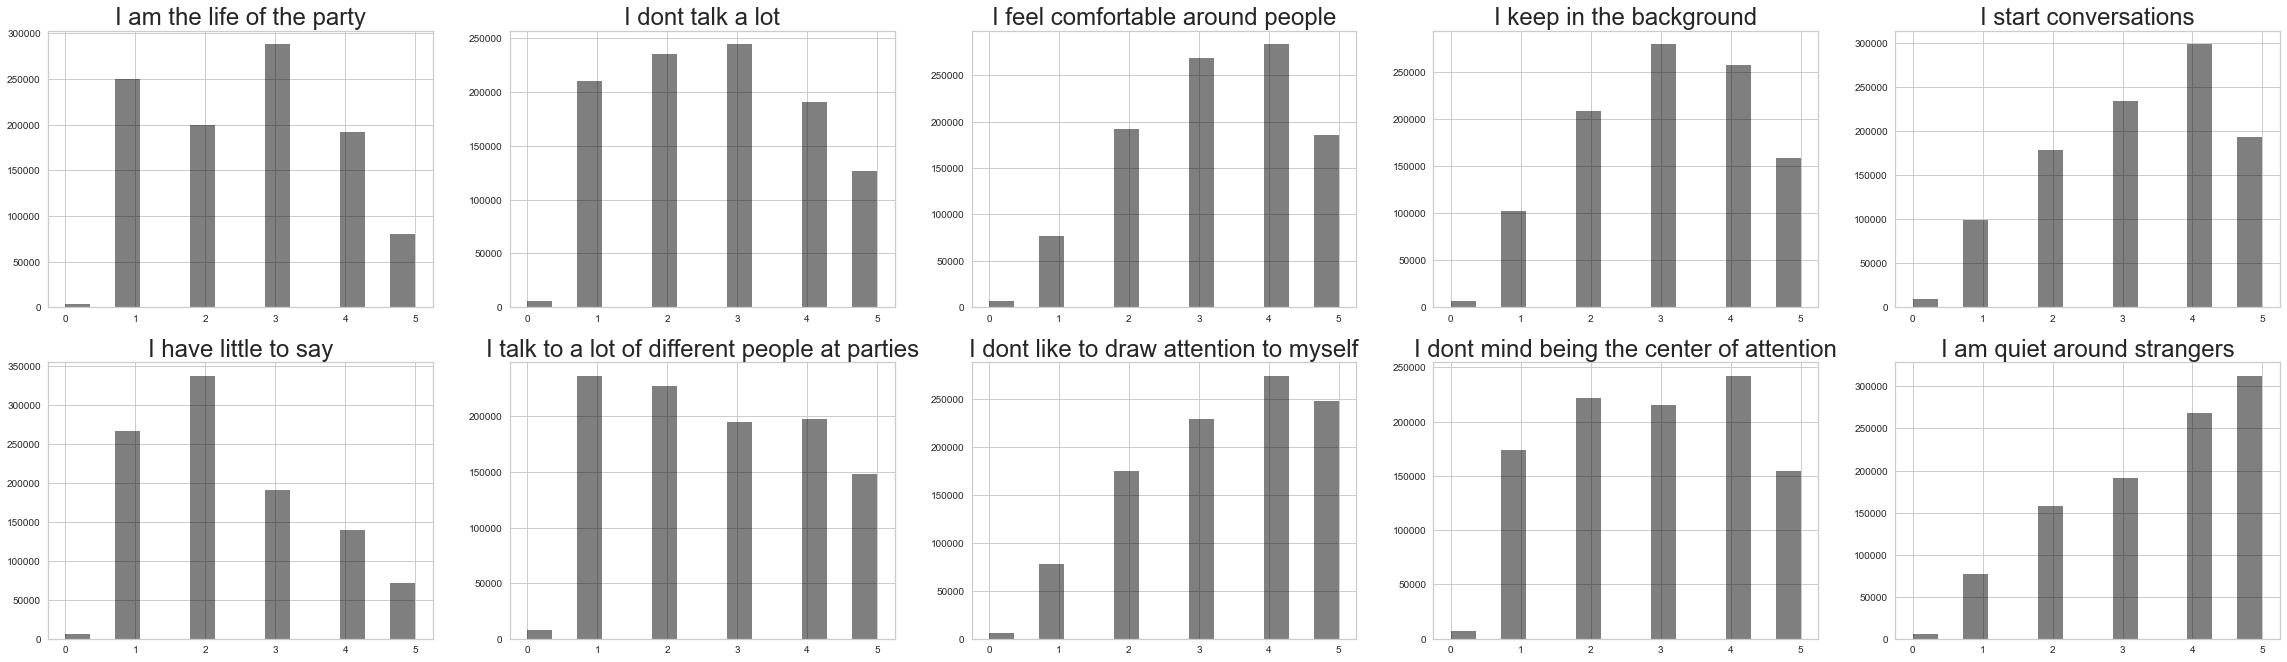

In [6]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'black')

Q&As Related to Emotional Stability Personality


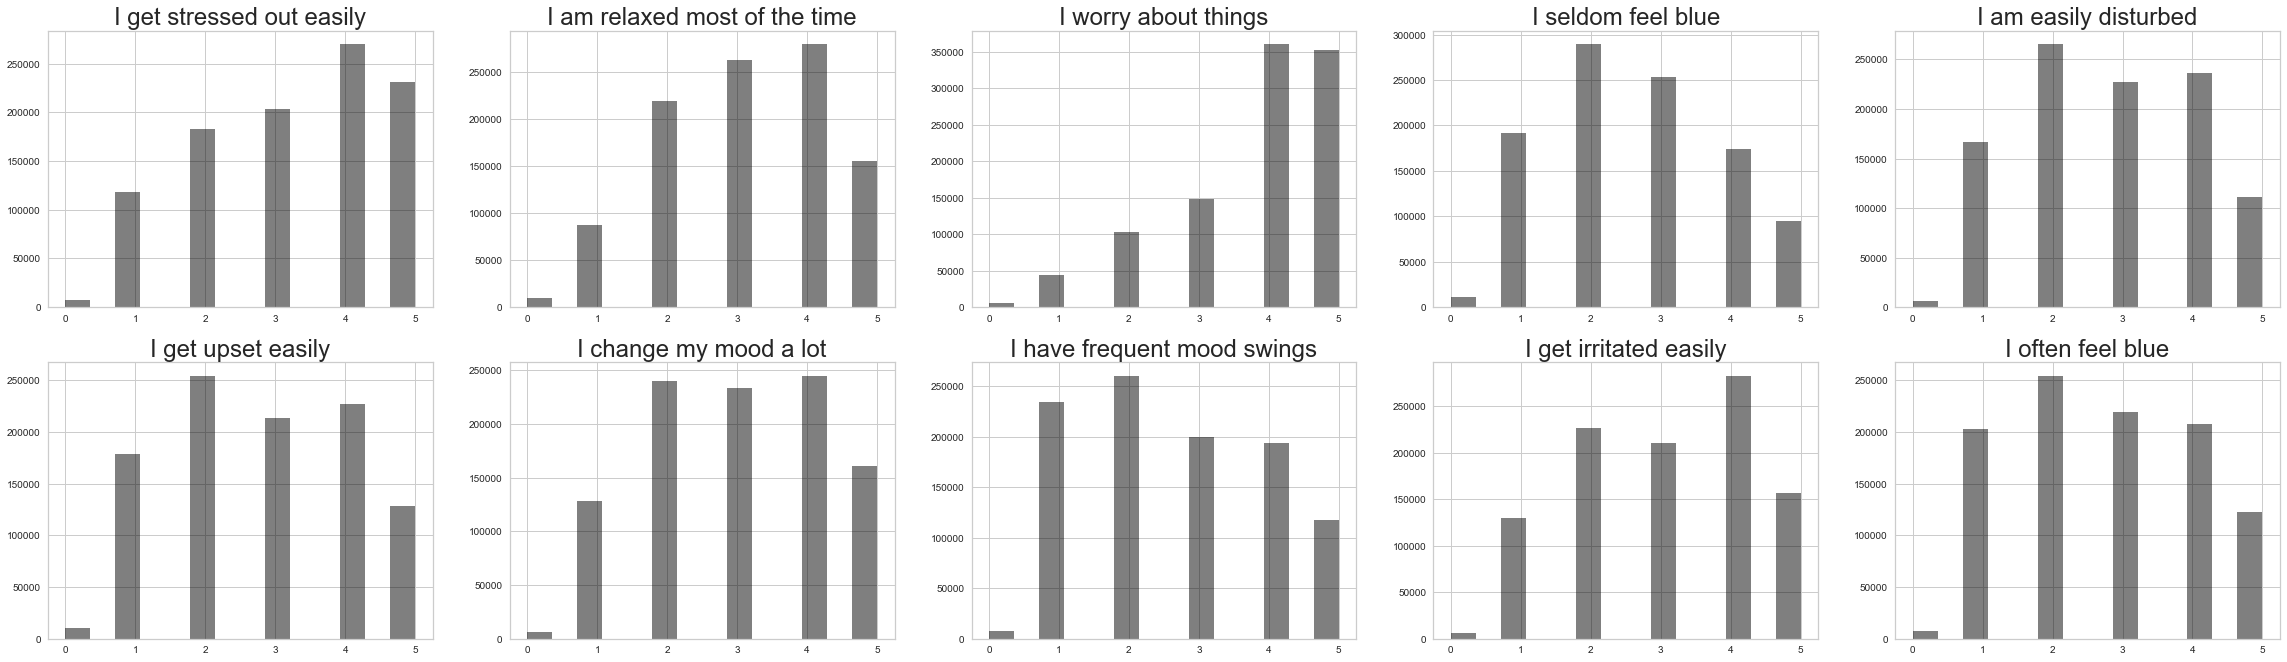

In [7]:
print('Q&As Related to Emotional Stability Personality')
vis_questions(EST, est_questions, 'black')

Q&As Related to Agreeableness Personality


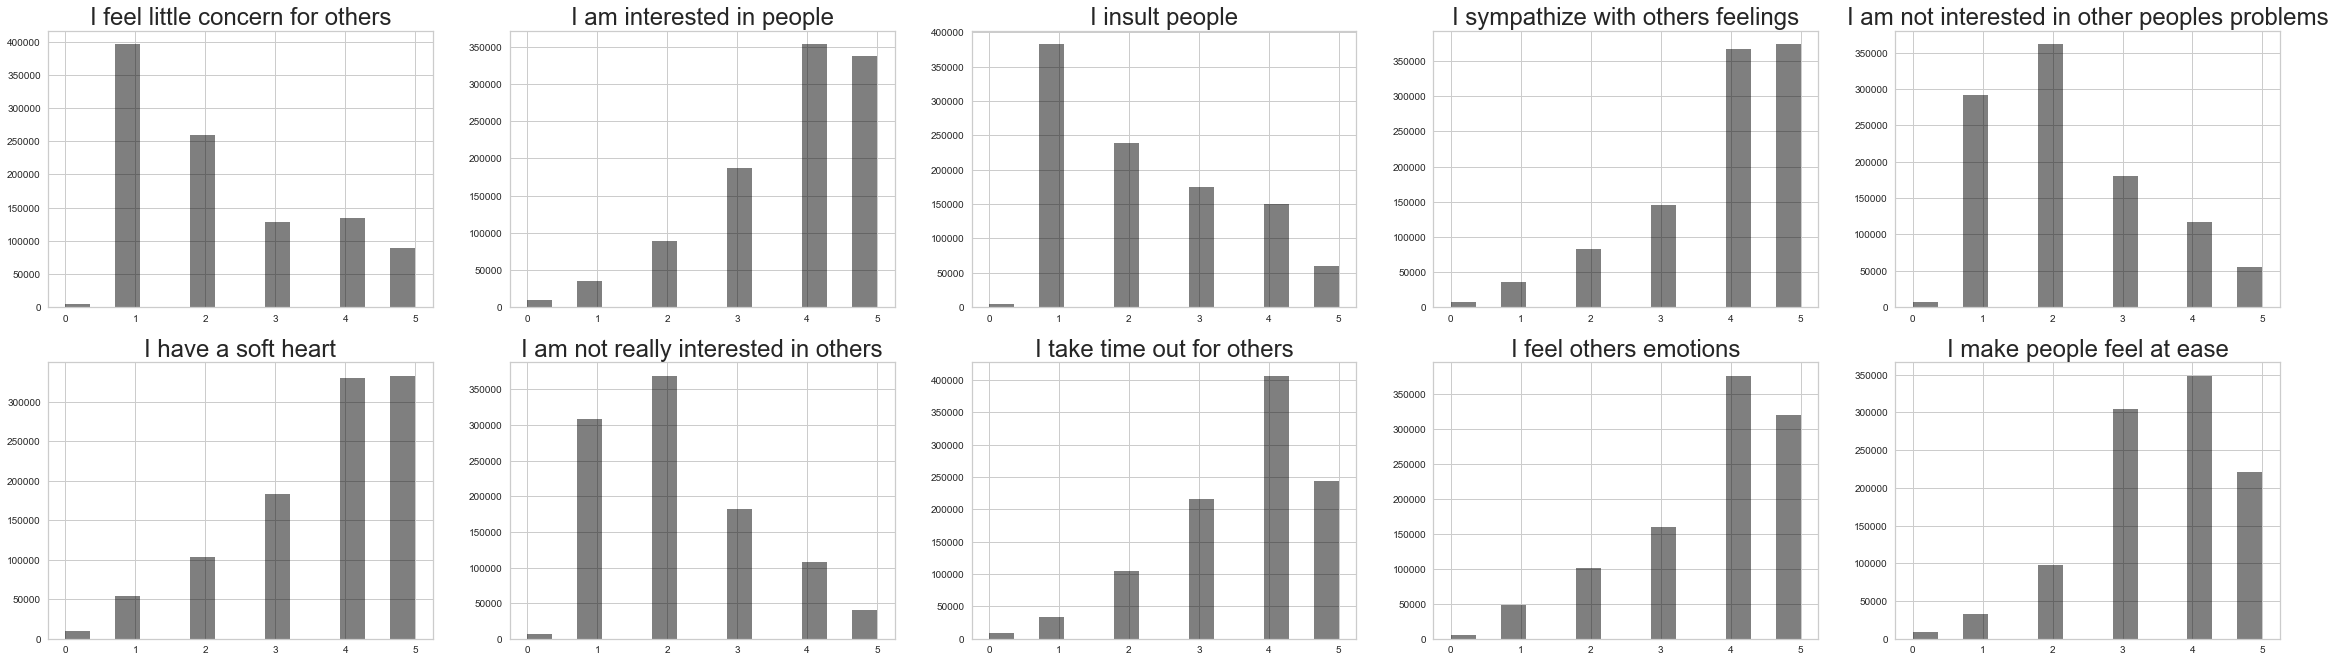

In [8]:
print('Q&As Related to Agreeableness Personality')
vis_questions(AGR, agr_questions, 'black')

Q&As Related to Conscentiousness Personality


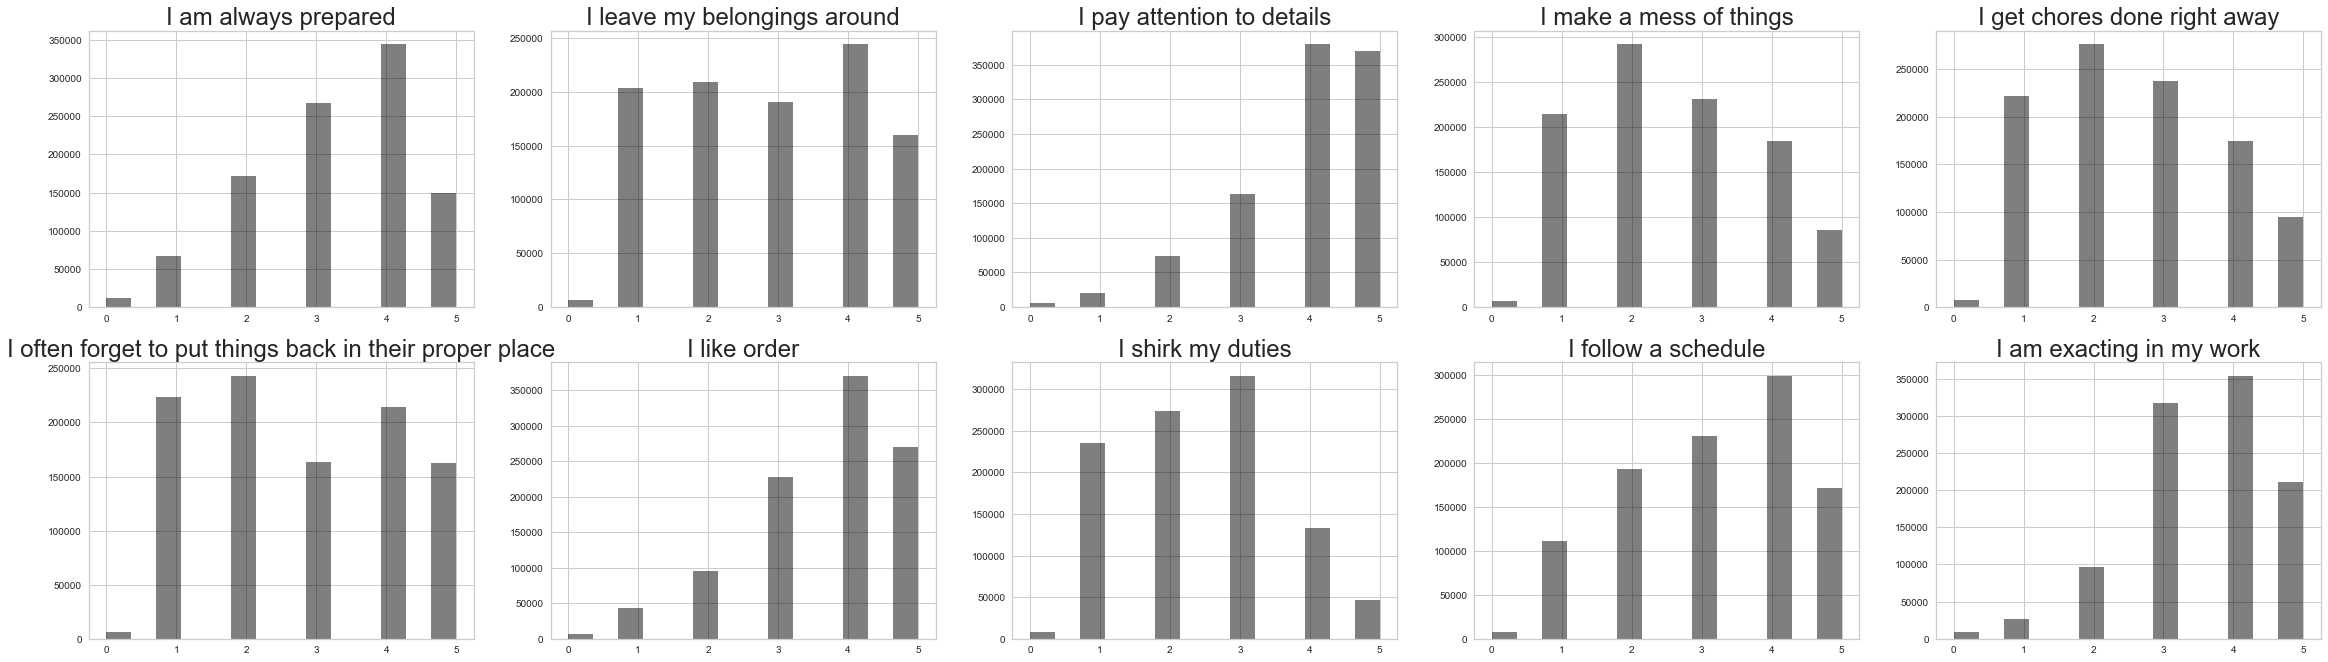

In [9]:
print('Q&As Related to Conscentiousness Personality')
vis_questions(CSN, csn_questions, 'black')

Q&As Related to Openness Personality


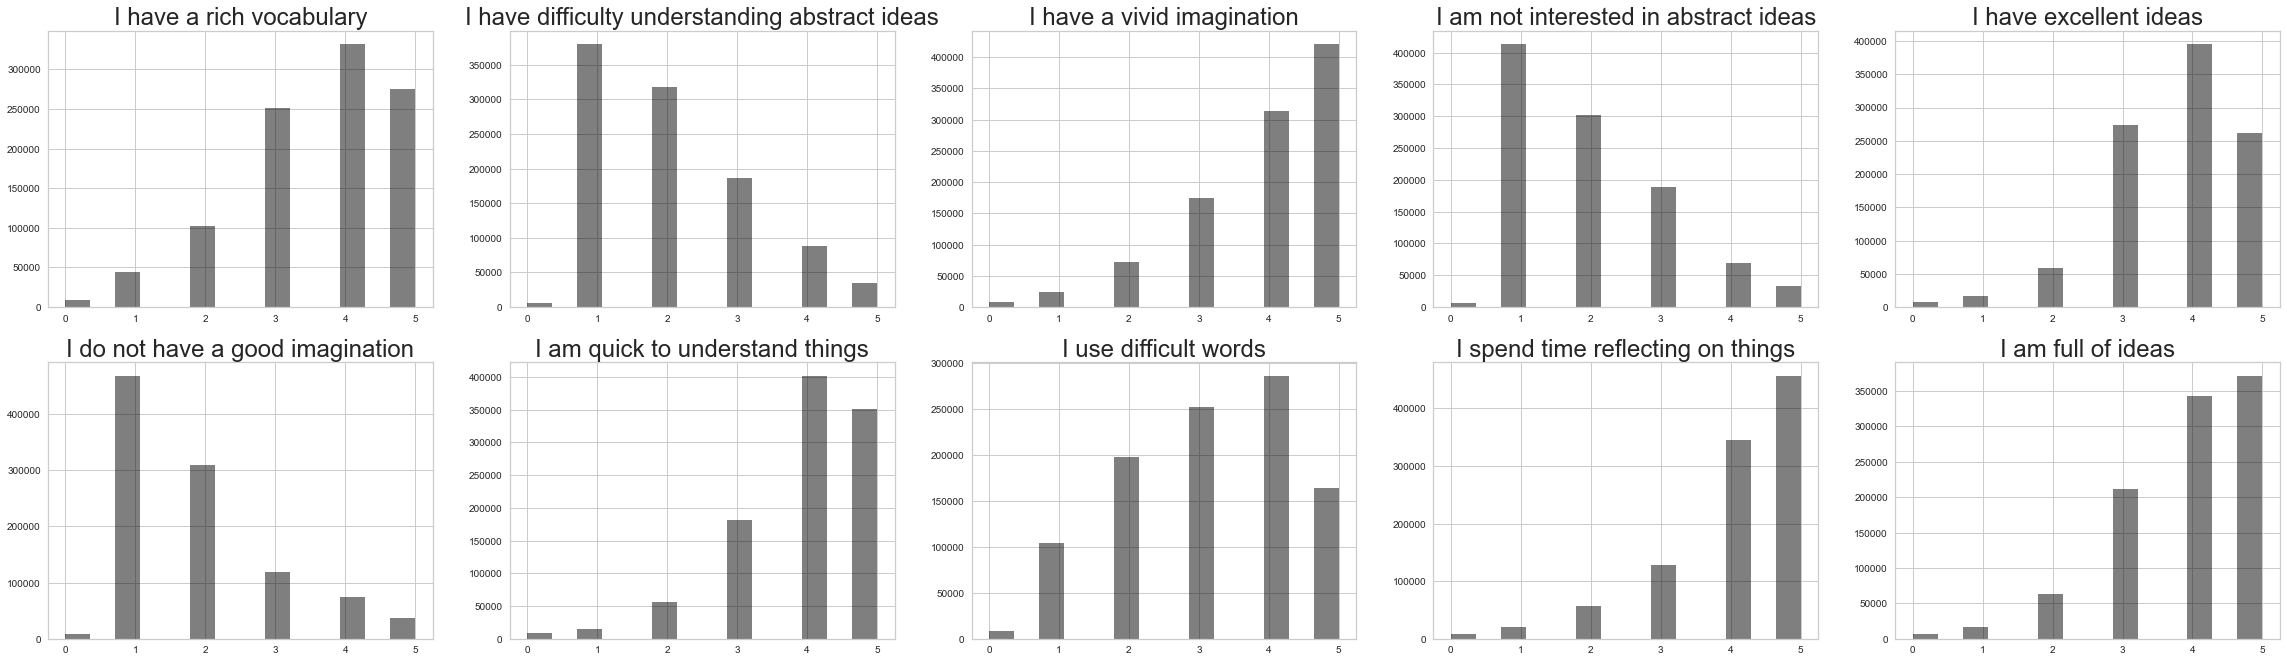

In [10]:
print('Q&As Related to Openness Personality')
vis_questions(OPN, opn_questions, 'black')

In [12]:
#ADD MORE EDA HERE


# The Task

The main task is to create clusters with the given data. The main problem with these kind of dataset is that there is no exact `label` that we can use to create the clustering. There are unsupervised machine learning models that handle this situation but for this experiment, we will be using the **K-Means cluster**.


> K-means cluster is an iterative algorithm that divides an unlabeled dataset into *k* different clusters in such a way that each row in the dataset belongs only to one group that has similar properties or `features`. 

Similar, to the K-nearest neighbor algorithm, this algorithm makes use of a centroid where each cluster is associated with it. Since we will be evaulating the five personality makers, we will be setting our number of clusters `k` to 5.

In [11]:
df = data

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df)
predictions = k_fit.labels_

# Create a new column of clusters to predict the data
df['Cluster'] = predictions

### Analysis

Now, we get the mean of each of the personality makers for each clusters. 

In [12]:
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df[ext].sum(axis=1)/10
data_sums['neurotic'] = df[est].sum(axis=1)/10
data_sums['agreeable'] = df[agr].sum(axis=1)/10
data_sums['conscientious'] = df[csn].sum(axis=1)/10
data_sums['open'] = df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.018470,3.020026,3.152761,3.123684,3.274473
1,3.093919,2.970616,3.144397,3.095299,3.120624
2,3.081910,3.074613,3.186168,3.109675,3.163959
3,3.047448,2.963310,3.360828,3.102483,3.024138
4,3.082066,3.086114,3.190352,3.127633,3.171624


## Principal Component Analysis

**Prinicipal Component analysis (PCA)** is a dimensionality-reduction method used to reduce dimensionality (or features) of large datasets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. However, dimensionality-reduction would have a minimal trade-off to the accuracy of the result. Here, we use PCA to visualize the personality clusters. To do this, we will be reducing the features from 50 (the number of questions) to 2 `n_components`. This is for us to visualize the graph in a 2D-plane.

In [69]:
#PCA?

In [16]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions

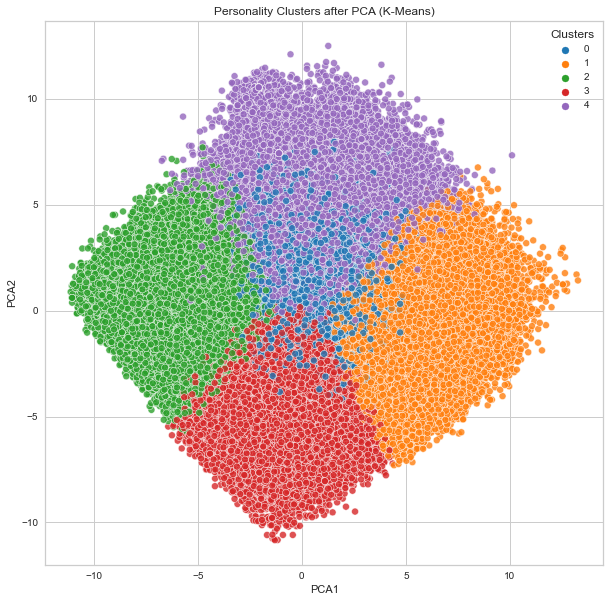

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (K-Means)');

## Finding an optimum number of groups


### Elbow
The question now is is the value `5` the best `k` for the clustering given the data. `KElbowVisualizer` is used to find an optimal number  of clusters for k-means clustering using the "elbow" method. Here, we pass a range of k's to evaluate. Once we fit this to the data we can make use of its attribute, the elbow value which is the optimum value.

In [72]:
#KElbowVisualizer?
# Elbow Method - (check)
# Gap Statistics - (wala pa) 

In [68]:
MinMaxScaler?

In [70]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'Cluster'],
      dtype='object')

In [74]:
df

array([[0.8 , 0.2 , 1.  , ..., 0.8 , 1.  , 1.  ],
       [0.6 , 1.  , 0.6 , ..., 1.  , 0.6 , 0.5 ],
       [0.4 , 0.6 , 0.8 , ..., 0.8 , 0.8 , 0.5 ],
       ...,
       [0.8 , 0.6 , 0.8 , ..., 1.  , 0.8 , 0.75],
       [0.4 , 0.8 , 0.6 , ..., 1.  , 0.6 , 0.75],
       [0.8 , 0.4 , 0.8 , ..., 1.  , 1.  , 1.  ]])

Initialization complete
Iteration 0, inertia 3079917.720000002.
Iteration 1, inertia 1854651.1728926972.
Iteration 2, inertia 1833777.7620791323.
Iteration 3, inertia 1831360.1557155438.
Iteration 4, inertia 1830517.2905071215.
Iteration 5, inertia 1830078.5304517196.
Iteration 6, inertia 1829823.5901693255.
Iteration 7, inertia 1829672.0993986074.
Iteration 8, inertia 1829586.6630716943.
Iteration 9, inertia 1829537.691075848.
Iteration 10, inertia 1829509.9815428774.
Iteration 11, inertia 1829494.3560625857.
Iteration 12, inertia 1829485.4489186676.
Iteration 13, inertia 1829480.450720986.
Converged at iteration 13: center shift 4.400129909542576e-06 within tolerance 5.854699669306615e-06.
Initialization complete
Iteration 0, inertia 2880881.6399999736.
Iteration 1, inertia 1850677.1695243418.
Iteration 2, inertia 1835695.5348333982.
Iteration 3, inertia 1831713.287789179.
Iteration 4, inertia 1830472.2190717286.
Iteration 5, inertia 1829696.6296253563.
Iteration 6, inertia 1829528.7

Iteration 14, inertia 1737018.2020160647.
Iteration 15, inertia 1736942.8542848828.
Iteration 16, inertia 1736864.6687420888.
Iteration 17, inertia 1736786.3675747106.
Iteration 18, inertia 1736710.7472475544.
Iteration 19, inertia 1736630.7531334716.
Iteration 20, inertia 1736548.296418765.
Iteration 21, inertia 1736469.4222799907.
Iteration 22, inertia 1736391.9354301705.
Iteration 23, inertia 1736312.9772794964.
Iteration 24, inertia 1736235.0855238102.
Iteration 25, inertia 1736157.7335718228.
Iteration 26, inertia 1736083.180757603.
Iteration 27, inertia 1736010.817288605.
Iteration 28, inertia 1735943.7901781434.
Iteration 29, inertia 1735880.5149500053.
Iteration 30, inertia 1735820.7324878997.
Iteration 31, inertia 1735766.2272035605.
Iteration 32, inertia 1735713.5961050987.
Iteration 33, inertia 1735665.1246839224.
Iteration 34, inertia 1735619.827545212.
Iteration 35, inertia 1735578.2836891622.
Iteration 36, inertia 1735542.1547815492.
Iteration 37, inertia 1735510.22402459

Iteration 6, inertia 1745402.737214669.
Iteration 7, inertia 1741124.491886457.
Iteration 8, inertia 1739152.82804609.
Iteration 9, inertia 1738232.8229005765.
Iteration 10, inertia 1737807.1488139944.
Iteration 11, inertia 1737604.4024053577.
Iteration 12, inertia 1737501.3487667681.
Iteration 13, inertia 1737446.1654028506.
Iteration 14, inertia 1737410.5558977486.
Iteration 15, inertia 1737385.8737727513.
Iteration 16, inertia 1737367.5644319272.
Iteration 17, inertia 1737353.8272855112.
Iteration 18, inertia 1737342.7683819663.
Iteration 19, inertia 1737333.3453114717.
Iteration 20, inertia 1737325.219357077.
Iteration 21, inertia 1737318.107903512.
Iteration 22, inertia 1737312.7172137639.
Iteration 23, inertia 1737308.2795747072.
Iteration 24, inertia 1737304.6927006817.
Iteration 25, inertia 1737301.6415504199.
Iteration 26, inertia 1737299.0754186413.
Converged at iteration 26: center shift 4.826244565269339e-06 within tolerance 5.854699669306615e-06.
Initialization complete
It

Iteration 18, inertia 1679435.8254413432.
Iteration 19, inertia 1677656.0003623464.
Iteration 20, inertia 1676162.861429507.
Iteration 21, inertia 1674992.571989148.
Iteration 22, inertia 1674131.7025781581.
Iteration 23, inertia 1673525.562211838.
Iteration 24, inertia 1673110.5707357016.
Iteration 25, inertia 1672819.9275164313.
Iteration 26, inertia 1672620.748358216.
Iteration 27, inertia 1672483.2673289818.
Iteration 28, inertia 1672388.8845884781.
Iteration 29, inertia 1672326.643796949.
Iteration 30, inertia 1672282.615865909.
Iteration 31, inertia 1672252.2848234007.
Iteration 32, inertia 1672232.1004260504.
Iteration 33, inertia 1672217.9172818442.
Iteration 34, inertia 1672208.0933928643.
Iteration 35, inertia 1672201.394108226.
Iteration 36, inertia 1672196.172990296.
Iteration 37, inertia 1672192.5580489514.
Iteration 38, inertia 1672190.0314995944.
Converged at iteration 38: center shift 5.551367341944354e-06 within tolerance 5.854699669306615e-06.
Initialization complete


Iteration 44, inertia 1672304.9196318055.
Iteration 45, inertia 1672281.2895901417.
Iteration 46, inertia 1672262.1364766124.
Iteration 47, inertia 1672246.8253068973.
Iteration 48, inertia 1672234.735725889.
Iteration 49, inertia 1672225.5347063483.
Iteration 50, inertia 1672218.1251894329.
Iteration 51, inertia 1672212.111144436.
Iteration 52, inertia 1672206.5786924602.
Iteration 53, inertia 1672201.6796861468.
Iteration 54, inertia 1672197.883612454.
Iteration 55, inertia 1672194.9084350881.
Iteration 56, inertia 1672192.4347819877.
Iteration 57, inertia 1672190.5432506327.
Converged at iteration 57: center shift 4.917069910878883e-06 within tolerance 5.854699669306615e-06.
Initialization complete
Iteration 0, inertia 2547837.3200000054.
Iteration 1, inertia 1751580.1584094288.
Iteration 2, inertia 1722575.1531549857.
Iteration 3, inertia 1710203.566160631.
Iteration 4, inertia 1699508.456475551.
Iteration 5, inertia 1692169.9712993247.
Iteration 6, inertia 1688476.0121872064.
Iter

Iteration 21, inertia 1672353.652001383.
Iteration 22, inertia 1672322.3870159741.
Iteration 23, inertia 1672295.1780792796.
Iteration 24, inertia 1672272.6060278225.
Iteration 25, inertia 1672254.4213942625.
Iteration 26, inertia 1672240.5130921486.
Iteration 27, inertia 1672229.7894432847.
Iteration 28, inertia 1672221.175141198.
Iteration 29, inertia 1672214.4200607638.
Iteration 30, inertia 1672208.8670177902.
Iteration 31, inertia 1672203.5734080363.
Iteration 32, inertia 1672199.3963324002.
Iteration 33, inertia 1672196.0465584574.
Iteration 34, inertia 1672193.3047662089.
Iteration 35, inertia 1672191.214442898.
Converged at iteration 35: center shift 5.3800845692831485e-06 within tolerance 5.854699669306615e-06.
Initialization complete
Iteration 0, inertia 2951027.0800000057.
Iteration 1, inertia 1698799.1678413171.
Iteration 2, inertia 1686124.9221258452.
Iteration 3, inertia 1682732.323837652.
Iteration 4, inertia 1680444.1143860114.
Iteration 5, inertia 1678604.3858998797.
I

Iteration 66, inertia 1626577.813805717.
Iteration 67, inertia 1626573.2632554467.
Iteration 68, inertia 1626569.7300923849.
Iteration 69, inertia 1626566.7228171085.
Iteration 70, inertia 1626564.0900248624.
Iteration 71, inertia 1626561.9951511852.
Iteration 72, inertia 1626560.2423283746.
Iteration 73, inertia 1626558.653895536.
Converged at iteration 73: center shift 5.318768058323348e-06 within tolerance 5.854699669306615e-06.
Initialization complete
Iteration 0, inertia 2662691.9599999953.
Iteration 1, inertia 1693791.6491777888.
Iteration 2, inertia 1655706.9282433079.
Iteration 3, inertia 1646477.9571773447.
Iteration 4, inertia 1642545.7812717264.
Iteration 5, inertia 1639995.3943532242.
Iteration 6, inertia 1637808.540464247.
Iteration 7, inertia 1635700.2662520737.
Iteration 8, inertia 1633660.8790504588.
Iteration 9, inertia 1631832.9227284202.
Iteration 10, inertia 1630340.7965294428.
Iteration 11, inertia 1629188.250065769.
Iteration 12, inertia 1628378.6637186245.
Iterat

Iteration 28, inertia 1626636.4060072645.
Iteration 29, inertia 1626622.0854635495.
Iteration 30, inertia 1626610.0269752094.
Iteration 31, inertia 1626599.99490682.
Iteration 32, inertia 1626591.4556837338.
Iteration 33, inertia 1626584.2510342721.
Iteration 34, inertia 1626578.3312255065.
Iteration 35, inertia 1626573.7702950817.
Iteration 36, inertia 1626570.1947569111.
Iteration 37, inertia 1626567.158600223.
Iteration 38, inertia 1626564.5762896556.
Iteration 39, inertia 1626562.4243783308.
Iteration 40, inertia 1626560.6028140693.
Iteration 41, inertia 1626558.9567556758.
Converged at iteration 41: center shift 5.527493168327428e-06 within tolerance 5.854699669306615e-06.
Initialization complete
Iteration 0, inertia 2671941.159999985.
Iteration 1, inertia 1710247.7207521717.
Iteration 2, inertia 1665297.7568871719.
Iteration 3, inertia 1655061.373910498.
Iteration 4, inertia 1651571.1917061654.
Iteration 5, inertia 1649898.0647100296.
Iteration 6, inertia 1648902.8458766052.
Iter

Iteration 30, inertia 1626582.4523326177.
Iteration 31, inertia 1626576.8667517905.
Iteration 32, inertia 1626572.4511978906.
Iteration 33, inertia 1626569.1981114966.
Iteration 34, inertia 1626566.328494783.
Iteration 35, inertia 1626563.7803909336.
Iteration 36, inertia 1626561.691311691.
Iteration 37, inertia 1626559.8955203244.
Converged at iteration 37: center shift 5.451726787193168e-06 within tolerance 5.854699669306615e-06.
Initialization complete
Iteration 0, inertia 2521322.360000006.
Iteration 1, inertia 1692081.022382575.
Iteration 2, inertia 1637874.8946726471.
Iteration 3, inertia 1618129.5257629887.
Iteration 4, inertia 1611862.985031418.
Iteration 5, inertia 1609096.236913727.
Iteration 6, inertia 1607543.4859049032.
Iteration 7, inertia 1606596.798437419.
Iteration 8, inertia 1605981.2401348557.
Iteration 9, inertia 1605540.8253194445.
Iteration 10, inertia 1605213.352551107.
Iteration 11, inertia 1604945.1667963031.
Iteration 12, inertia 1604722.0398252355.
Iteration 

Iteration 26, inertia 1588214.894771873.
Iteration 27, inertia 1588210.5811881153.
Iteration 28, inertia 1588207.1377082309.
Iteration 29, inertia 1588204.3536427845.
Iteration 30, inertia 1588201.9479282107.
Iteration 31, inertia 1588199.8994066725.
Iteration 32, inertia 1588198.0270325532.
Iteration 33, inertia 1588196.2999790013.
Iteration 34, inertia 1588194.7179220952.
Converged at iteration 34: center shift 5.683608117654589e-06 within tolerance 5.854699669306615e-06.
Initialization complete
Iteration 0, inertia 2522037.3200000003.
Iteration 1, inertia 1649313.0822831234.
Iteration 2, inertia 1626589.2253231066.
Iteration 3, inertia 1618933.4393821121.
Iteration 4, inertia 1614373.3395194132.
Iteration 5, inertia 1611213.886977434.
Iteration 6, inertia 1608885.1648841612.
Iteration 7, inertia 1607043.6860597923.
Iteration 8, inertia 1605531.5668299175.
Iteration 9, inertia 1604091.7325395527.
Iteration 10, inertia 1602573.4628968774.
Iteration 11, inertia 1600891.397925649.
Itera

Iteration 55, inertia 1598708.2802556728.
Iteration 56, inertia 1598698.2311751265.
Iteration 57, inertia 1598688.7219828907.
Iteration 58, inertia 1598679.77018296.
Iteration 59, inertia 1598672.0849000416.
Iteration 60, inertia 1598664.8384154101.
Iteration 61, inertia 1598658.0740656538.
Iteration 62, inertia 1598652.1567021406.
Iteration 63, inertia 1598646.7106641487.
Iteration 64, inertia 1598641.4419118364.
Iteration 65, inertia 1598636.9094696525.
Iteration 66, inertia 1598632.562714142.
Iteration 67, inertia 1598628.5369610633.
Iteration 68, inertia 1598624.6873608276.
Iteration 69, inertia 1598621.4054593695.
Iteration 70, inertia 1598618.3266696683.
Iteration 71, inertia 1598615.46967667.
Iteration 72, inertia 1598612.9059913654.
Iteration 73, inertia 1598610.5355324293.
Iteration 74, inertia 1598608.3241055442.
Iteration 75, inertia 1598606.0984352627.
Iteration 76, inertia 1598604.0889521441.
Iteration 77, inertia 1598602.2730541825.
Iteration 78, inertia 1598600.843425754

Iteration 18, inertia 1575903.2640460327.
Iteration 19, inertia 1575671.2954371665.
Iteration 20, inertia 1575459.3230884946.
Iteration 21, inertia 1575252.0150203416.
Iteration 22, inertia 1575068.7109885917.
Iteration 23, inertia 1574906.5581722236.
Iteration 24, inertia 1574760.612081992.
Iteration 25, inertia 1574633.405617619.
Iteration 26, inertia 1574526.8710162803.
Iteration 27, inertia 1574435.9790224135.
Iteration 28, inertia 1574359.6368565762.
Iteration 29, inertia 1574298.0202817773.
Iteration 30, inertia 1574246.3116086083.
Iteration 31, inertia 1574200.0754310181.
Iteration 32, inertia 1574159.7687797109.
Iteration 33, inertia 1574125.729463154.
Iteration 34, inertia 1574095.0612395327.
Iteration 35, inertia 1574066.611429195.
Iteration 36, inertia 1574039.9936903769.
Iteration 37, inertia 1574013.56141542.
Iteration 38, inertia 1573987.040883938.
Iteration 39, inertia 1573959.5035159125.
Iteration 40, inertia 1573930.0658414864.
Iteration 41, inertia 1573895.556411361.


Iteration 6, inertia 1584335.123201958.
Iteration 7, inertia 1581548.7036001822.
Iteration 8, inertia 1579487.6008110885.
Iteration 9, inertia 1578025.6044711773.
Iteration 10, inertia 1576985.901379204.
Iteration 11, inertia 1576263.2091493832.
Iteration 12, inertia 1575739.2061271984.
Iteration 13, inertia 1575354.6379552172.
Iteration 14, inertia 1575067.7202162743.
Iteration 15, inertia 1574857.0375190815.
Iteration 16, inertia 1574700.4174512676.
Iteration 17, inertia 1574581.5924191638.
Iteration 18, inertia 1574494.7519021959.
Iteration 19, inertia 1574429.9662798753.
Iteration 20, inertia 1574377.789794736.
Iteration 21, inertia 1574334.0243152278.
Iteration 22, inertia 1574296.7900720441.
Iteration 23, inertia 1574265.984140194.
Iteration 24, inertia 1574240.8861108716.
Iteration 25, inertia 1574220.3322617884.
Iteration 26, inertia 1574203.413860009.
Iteration 27, inertia 1574188.6783589935.
Iteration 28, inertia 1574175.6437799018.
Iteration 29, inertia 1574164.094888074.
It

Iteration 100, inertia 1572883.7717938004.
Iteration 101, inertia 1572881.9827449257.
Iteration 102, inertia 1572880.4022133462.
Iteration 103, inertia 1572878.8973928588.
Iteration 104, inertia 1572877.5332670652.
Iteration 105, inertia 1572876.2890751115.
Converged at iteration 105: center shift 5.7928757392232764e-06 within tolerance 5.854699669306615e-06.
Initialization complete
Iteration 0, inertia 2254986.3199999975.
Iteration 1, inertia 1627254.744793836.
Iteration 2, inertia 1601451.6668953924.
Iteration 3, inertia 1594904.7177242972.
Iteration 4, inertia 1591372.5338612557.
Iteration 5, inertia 1588977.159856992.
Iteration 6, inertia 1587244.2141684138.
Iteration 7, inertia 1585900.8914897544.
Iteration 8, inertia 1584758.3220856867.
Iteration 9, inertia 1583808.7894528406.
Iteration 10, inertia 1582962.4666511456.
Iteration 11, inertia 1582181.4456477528.
Iteration 12, inertia 1581463.0506784837.
Iteration 13, inertia 1580818.9257426239.
Iteration 14, inertia 1580256.01743829

Iteration 39, inertia 1559686.6476257846.
Iteration 40, inertia 1559681.2978777825.
Iteration 41, inertia 1559677.0102921643.
Iteration 42, inertia 1559673.4696742713.
Iteration 43, inertia 1559670.7375838414.
Iteration 44, inertia 1559668.3016315624.
Iteration 45, inertia 1559666.1152314902.
Iteration 46, inertia 1559664.3404758195.
Iteration 47, inertia 1559662.8673163028.
Iteration 48, inertia 1559661.4465236464.
Iteration 49, inertia 1559660.100989593.
Iteration 50, inertia 1559658.8494728305.
Converged at iteration 50: center shift 5.479817210252467e-06 within tolerance 5.854699669306615e-06.
Initialization complete
Iteration 0, inertia 2385467.3199999924.
Iteration 1, inertia 1664508.1517110337.
Iteration 2, inertia 1609899.6705797198.
Iteration 3, inertia 1593881.526907518.
Iteration 4, inertia 1586130.2326652661.
Iteration 5, inertia 1582153.006179613.
Iteration 6, inertia 1580171.5595429477.
Iteration 7, inertia 1579163.81555537.
Iteration 8, inertia 1578592.5117882108.
Iterat

Iteration 180, inertia 1572692.2197825199.
Iteration 181, inertia 1572690.0907335095.
Iteration 182, inertia 1572687.8210829257.
Iteration 183, inertia 1572676.927547984.
Iteration 184, inertia 1572672.8822986844.
Iteration 185, inertia 1572670.2474313737.
Iteration 186, inertia 1572668.4859999088.
Iteration 187, inertia 1572666.9826572095.
Iteration 188, inertia 1572665.7466045944.
Iteration 189, inertia 1572664.6225157287.
Iteration 190, inertia 1572663.6537146117.
Converged at iteration 190: center shift 4.662363505826002e-06 within tolerance 5.854699669306615e-06.


/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

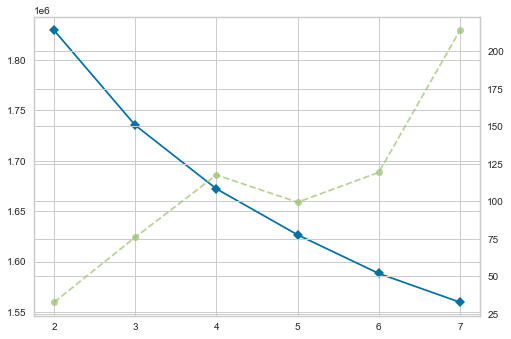

In [78]:
df_opt = data.drop('Cluster', axis=1)

columns = list(df_opt.columns)
#columns.remove('Cluster')

scaler = MinMaxScaler(feature_range=(0,1))
df_opt = scaler.fit_transform(df_opt)
df_opt = pd.DataFrame(df_opt, columns=columns)
visualizer = KElbowVisualizer(KMeans(verbose=1), k=(2,8))

In [81]:

visualizer.elbow_value_

With the graph shown above, we can prove that `5` is the most optimal number for clustering the dataset. Now let's try to find the optimum number with the `Gap Statistics` method.


### Gap Statistics

# Alternative Models

Other than the usual K-means cluster approach, there are also alternative methods that we can use to cluster an unlabeled dataset. 

## Batch K-Means

Mini-Batch K-Means uses small, random fixed-size batch of data to store in memory and with each iteration, a random sample of the data will be collected and used in updating the clusters.


In [20]:
MiniBatchKMeans?

In [22]:
df_mb = data

mbKMeans = MiniBatchKMeans(n_clusters=5, max_iter=500, verbose=1, random_state=42)
mbKMeans.fit(df_mb)

# Create a new column of clusters to predict the data
df_mb['Cluster'] = mbKMeans.labels_

Init 1/3 with method k-means++
Inertia for init 1/3: 311315.0
Init 2/3 with method k-means++
Inertia for init 2/3: 276264.0
Init 3/3 with method k-means++
Inertia for init 3/3: 286998.0
Minibatch step 1/339699: mean batch inertia: 90.1025390625
Minibatch step 2/339699: mean batch inertia: 60.11215234195104, ewa inertia: 60.11215234195104
Minibatch step 3/339699: mean batch inertia: 60.83473857967835, ewa inertia: 60.11427947430579
Minibatch step 4/339699: mean batch inertia: 60.010000624934456, ewa inertia: 60.11397250068404
Minibatch step 5/339699: mean batch inertia: 60.76039448373815, ewa inertia: 60.11587542249902
Minibatch step 6/339699: mean batch inertia: 59.48802920069165, ewa inertia: 60.11402718357267
Minibatch step 7/339699: mean batch inertia: 60.279980097682824, ewa inertia: 60.11451571185419
Minibatch step 8/339699: mean batch inertia: 60.413710458724424, ewa inertia: 60.115396474306074
Minibatch step 9/339699: mean batch inertia: 58.23920843161652, ewa inertia: 60.109873

### Get Mean

In [23]:
col_list = list(df_mb)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums_mb = pd.DataFrame()
data_sums_mb['extroversion'] = df_mb[ext].sum(axis=1)/10
data_sums_mb['neurotic'] = df_mb[est].sum(axis=1)/10
data_sums_mb['agreeable'] = df_mb[agr].sum(axis=1)/10
data_sums_mb['conscientious'] = df_mb[csn].sum(axis=1)/10
data_sums_mb['open'] = df_mb[opn].sum(axis=1)/10
data_sums_mb['clusters'] = mbKMeans.labels_
data_sums_mb.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.969532,3.613333,3.118876,3.121530,3.186588
1,3.086145,2.472284,3.191892,3.112960,3.294116
2,3.009718,3.488690,3.244585,3.248414,3.356553
3,2.926446,2.599338,2.893559,2.977666,3.179553
4,3.053237,3.077347,3.248388,3.136434,3.365358


### Computing the PCA

In [24]:
pca_mb = PCA(n_components=2)
pca_mb_fit = pca_mb.fit_transform(df_mb)

df_pca_mb = pd.DataFrame(data=pca_mb_fit, columns=['PCA1', 'PCA2'])
df_pca_mb['Clusters'] = mbKMeans.labels_
# TSNE

### Visualizing the Model

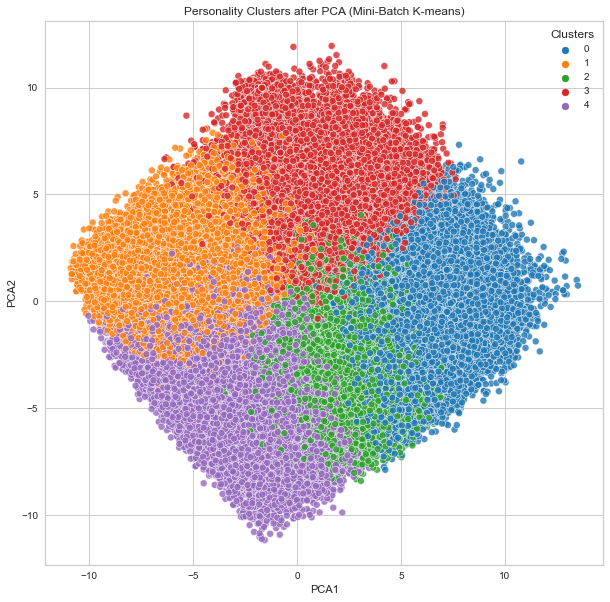

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_mb, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (Mini-Batch K-means)');

## Gaussian Mixture Model

explain

In [28]:
df_gmm = data

gmm = GaussianMixture(n_components=5)
gmm.fit(df_gmm)

# Create a new column of clusters to predict the data
df_gmm['Cluster'] = gmm.predict(df_gmm)

### Get Mean

explain

In [29]:
col_list = list(df_gmm)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums_gmm = pd.DataFrame()
data_sums_gmm['extroversion'] = df_gmm[ext].sum(axis=1)/10
data_sums_gmm['neurotic'] = df_gmm[est].sum(axis=1)/10
data_sums_gmm['agreeable'] = df_gmm[agr].sum(axis=1)/10
data_sums_gmm['conscientious'] = df_gmm[csn].sum(axis=1)/10
data_sums_gmm['open'] = df_gmm[opn].sum(axis=1)/10
data_sums_gmm['clusters'] = df_gmm['Cluster']
data_sums_gmm.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.969532,3.613333,3.118876,3.121530,3.186588
1,2.926446,2.599338,2.893559,2.977666,3.179553
2,3.086145,2.472284,3.191892,3.112960,3.294116
3,3.009718,3.488690,3.244585,3.248414,3.356553
4,3.053237,3.077347,3.248388,3.136434,3.365358


### Computing for the PCA

In [30]:
pca_gmm = PCA(n_components=2)
pca_gmm_fit = pca_mb.fit_transform(df_gmm)

df_pca_gmm = pd.DataFrame(data=pca_gmm_fit, columns=['PCA1', 'PCA2'])
df_pca_gmm['Clusters'] = list(df_gmm['Cluster'])

### Visualizing the Clusters with PCA

explain

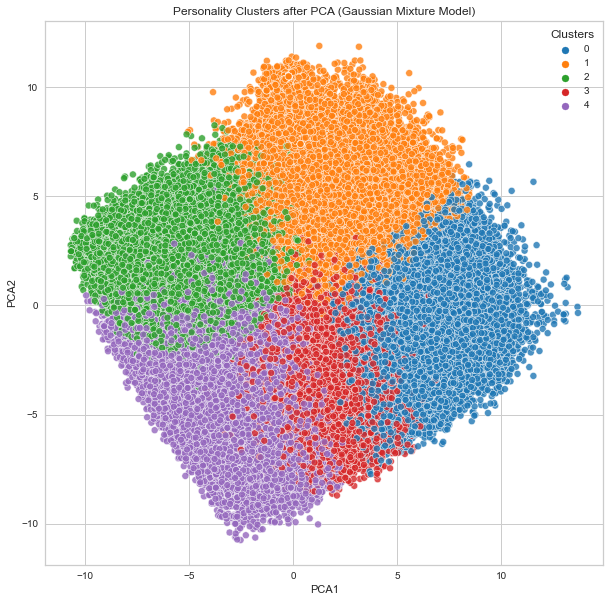

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_gmm, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (Gaussian Mixture Model)');

### Validating and Evaluating the Clusters

In [65]:
# remove column cluster
col = list(df_pca.columns)
col.remove("Clusters")
col

df_eval = pd.DataFrame(columns=["Model", "Calinski-Harabasz", "Davies_Bouldin", "Silhouette"])
print("Computing Scores in K-Means...")
df_eval.loc[len(df_eval.index)]= ["K-means", calinski_harabasz_score(df_pca[col], df_pca['Clusters']), davies_bouldin_score(df_pca[col], df_pca['Clusters']), silhouette_score(df_pca[col], df_pca['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Mini-Batch K-means...")
df_eval.loc[len(df_eval.index)]= ["Mini-Batch K-means", calinski_harabasz_score(df_pca_mb[col], df_pca_mb['Clusters']), davies_bouldin_score(df_pca_mb[col], df_pca_mb['Clusters']), silhouette_score(df_pca_mb[col], df_pca_mb['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Gaussian Mixture Model...")
df_eval.loc[len(df_eval.index)]= ["Gaussian Mixture Model", calinski_harabasz_score(df_pca_gmm[col], df_pca_gmm['Clusters']), davies_bouldin_score(df_pca_gmm[col], df_pca_gmm['Clusters']), silhouette_score(df_pca_gmm[col], df_pca_gmm['Clusters'], metric='euclidean', sample_size=100000)] 

Computing Scores in K-Means...
Computing Scores in Mini-Batch K-means...
Computing Scores in Gaussian Mixture Model...


In [66]:
df_eval

,Model,Calinski-Harabasz,Davies_Bouldin,Silhouette
0,K-means,333075.259335,1.391077,0.211410
1,Mini-Batch K-means,298483.161702,1.245719,0.161171
2,Gaussian Mixture Model,337394.795392,1.158645,0.197613
